In [14]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv("country_wise_latest.csv")
training_set = dataset_train.iloc[:,1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [15]:
# Creating a data structure with 20 timesteps and t+1 output
X_train = []
y_train = []
for i in range(20, 125):
    X_train.append(training_set_scaled[i-20:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [16]:
# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 3,activation='sigmoid',input_shape = (None, 1)))


In [17]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 220, batch_size = 32)


Epoch 1/220
4/4 [==============================] - 6s 26ms/step - loss: 0.1142
Epoch 2/220
4/4 [==============================] - 0s 31ms/step - loss: 0.0993
Epoch 3/220
4/4 [==============================] - 0s 31ms/step - loss: 0.0898
Epoch 4/220
4/4 [==============================] - 0s 30ms/step - loss: 0.0819
Epoch 5/220
4/4 [==============================] - 0s 27ms/step - loss: 0.0751
Epoch 6/220
4/4 [==============================] - 0s 27ms/step - loss: 0.0689
Epoch 7/220
4/4 [==============================] - 0s 28ms/step - loss: 0.0630
Epoch 8/220
4/4 [==============================] - 0s 29ms/step - loss: 0.0577
Epoch 9/220
4/4 [==============================] - 0s 30ms/step - loss: 0.0527
Epoch 10/220
4/4 [==============================] - 0s 27ms/step - loss: 0.0479
Epoch 11/220
4/4 [==============================] - 0s 29ms/step - loss: 0.0436
Epoch 12/220
4/4 [==============================] - 0s 26ms/step - loss: 0.0396
Epoch 13/220
4/4 [==============================]

4/4 [==============================] - 0s 33ms/step - loss: 0.0043
Epoch 104/220
4/4 [==============================] - 0s 29ms/step - loss: 0.0043
Epoch 105/220
4/4 [==============================] - 0s 28ms/step - loss: 0.0044
Epoch 106/220
4/4 [==============================] - 0s 25ms/step - loss: 0.0043
Epoch 107/220
4/4 [==============================] - 0s 24ms/step - loss: 0.0043
Epoch 108/220
4/4 [==============================] - 0s 28ms/step - loss: 0.0043
Epoch 109/220
4/4 [==============================] - 0s 28ms/step - loss: 0.0043
Epoch 110/220
4/4 [==============================] - 0s 26ms/step - loss: 0.0044
Epoch 111/220
4/4 [==============================] - 0s 29ms/step - loss: 0.0043
Epoch 112/220
4/4 [==============================] - 0s 28ms/step - loss: 0.0043
Epoch 113/220
4/4 [==============================] - 0s 28ms/step - loss: 0.0043
Epoch 114/220
4/4 [==============================] - 0s 26ms/step - loss: 0.0044
Epoch 115/220
4/4 [=======================

4/4 [==============================] - 0s 26ms/step - loss: 0.0043
Epoch 205/220
4/4 [==============================] - 0s 29ms/step - loss: 0.0043
Epoch 206/220
4/4 [==============================] - 0s 32ms/step - loss: 0.0043
Epoch 207/220
4/4 [==============================] - 0s 24ms/step - loss: 0.0043
Epoch 208/220
4/4 [==============================] - 0s 27ms/step - loss: 0.0043
Epoch 209/220
4/4 [==============================] - 0s 23ms/step - loss: 0.0043
Epoch 210/220
4/4 [==============================] - 0s 24ms/step - loss: 0.0043
Epoch 211/220
4/4 [==============================] - 0s 24ms/step - loss: 0.0043
Epoch 212/220
4/4 [==============================] - 0s 27ms/step - loss: 0.0043
Epoch 213/220
4/4 [==============================] - 0s 32ms/step - loss: 0.0044
Epoch 214/220
4/4 [==============================] - 0s 34ms/step - loss: 0.0044
Epoch 215/220
4/4 [==============================] - 0s 30ms/step - loss: 0.0043
Epoch 216/220
4/4 [=======================

In [18]:
# Joining the train and test dataset under the real no. 
dataset_test = pd.read_csv('country_wise_latest.csv')
test_set = dataset_test.iloc[:,1:2].values
real_covid_cases = np.concatenate((training_set[0:125], test_set), axis = 0)


In [19]:
# Getting the predicted number of cases
scaled_real_covid_cases= sc.fit_transform(real_covid_cases)
inputs = []
for i in range(126, 136):
    inputs.append(scaled_real_covid_cases[i-20:i, 0])
inputs = np.array(inputs)
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))

predicted_covid_cases = regressor.predict(inputs)

predicted_covid_cases = sc.inverse_transform(predicted_covid_cases)
predicted_covid_cases=predicted_covid_cases.astype('int64')


1/1 [==============================] - 1s 701ms/step


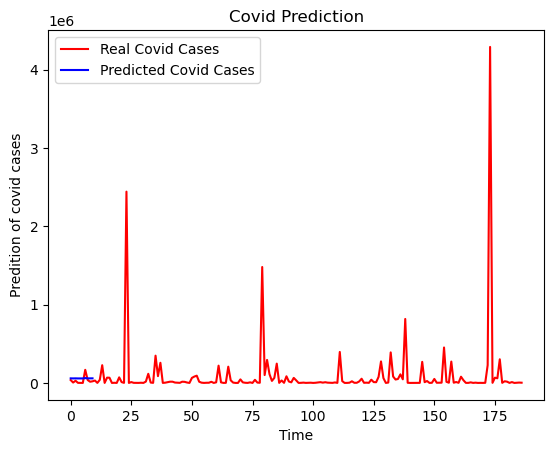

In [20]:
# Visualising the results
plt.plot(test_set, color = 'red', label = 'Real Covid Cases')
plt.plot(predicted_covid_cases, color = 'blue', label = 'Predicted Covid Cases')
plt.title('Covid Prediction')
plt.xlabel('Time')
plt.ylabel('Predition of covid cases')
plt.legend()
plt.show()